## Dataset Load

In [3]:
import pandas as pd
df = pd.read_csv('train.csv', sep='\t', index_col=0,on_bad_lines='skip')

## Data preprocessing

1- stemme
2- normalize
3- lemmatize

In [4]:
from hazm import *

stemmer = Stemmer()
normalizer = Normalizer()
lemmatizer = Lemmatizer()

stop_words = set([
    'و', 'در', 'به', 'از', 'که', 'این', 'است', 'را', 'با', 'برای', 'آن', 'یک', 'شود', 'شده', 'خود', 'ها', 'های',
    'کرد', 'می', 'بر', 'بود', 'نیز', 'تا', 'هم', 'من', 'ما', 'او', 'آنها', 'شما', 'ای', 'اما', 'اگر', 'یا', 'هر',
    'چند', 'همه', 'دیگر', 'بیشتر', 'باید', 'تواند'
])

def tokenize_and_stem(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    stemmed1_tokens = [normalizer.normalize(token) for token in stemmed_tokens]
    stemmed2_tokens = [lemmatizer.lemmatize(token) for token in stemmed1_tokens]

    return ' '.join(stemmed2_tokens)

df['comment_stemmed'] = df['comment'].apply(tokenize_and_stem)

4- vectorize

In [42]:
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['comment_stemmed'])
y = df['label_id']

## train_test_split

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


## Calculate Metrics

In [56]:
from sklearn.metrics import accuracy_score,precision_score , recall_score
def calculate_metrics(y_train,y_test,y_pred_train,y_pred_test):
    acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)
    precision= precision_score(y_true=y_test,y_pred=y_pred_test)
    recall = recall_score(y_true=y_test,y_pred=y_pred_test)
    print(f"accuracy train: {acc_train}   accuracy test: {acc_test}    precision: {precision}    recall: {recall}")
    return acc_train,acc_test,precision,recall

multinomial naive bayes

In [59]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

acc_train_NB,acc_test_NB,precision_NB,recall_NB = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy train: 0.8514599255339996   accuracy test: 0.8275132275132275    precision: 0.7885572139303483    recall: 0.89484827099506


SVM

In [60]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

acc_train_SVM,acc_test_SVM,precision_SVM,recall_SVM = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy train: 0.8841073878110915   accuracy test: 0.85326278659612    precision: 0.8198083067092652    recall: 0.9054340155257586


Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 128 , max_depth= 128 , min_samples_split=3)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

acc_train_RF,acc_test_RF,precision_RF,recall_RF = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy train: 0.9896727415245934   accuracy test: 0.8465608465608465    precision: 0.8076441102756893    recall: 0.9096683133380381


## Comparison

1- Train Accuracy

2- Test Accuracy

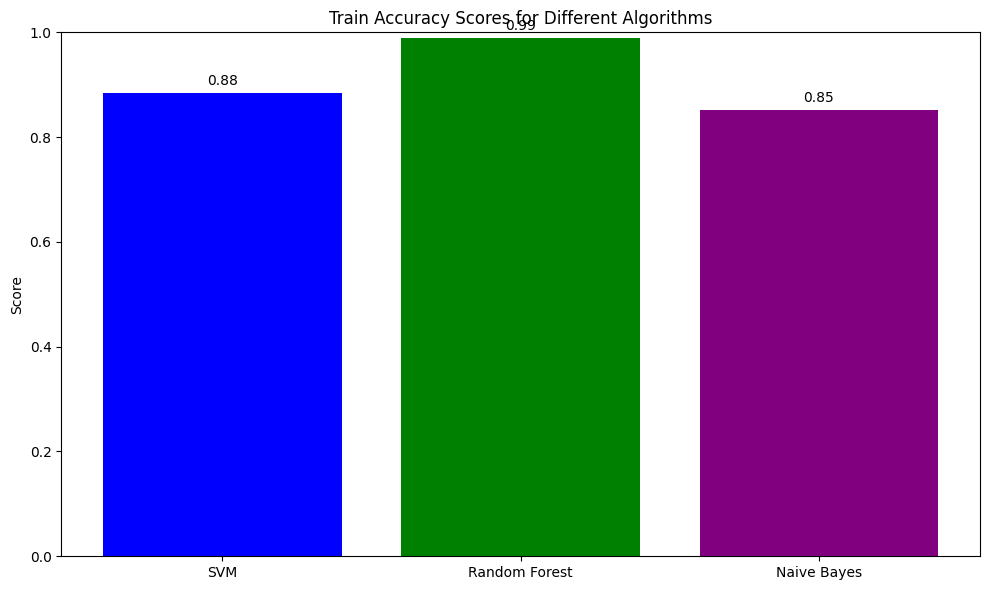

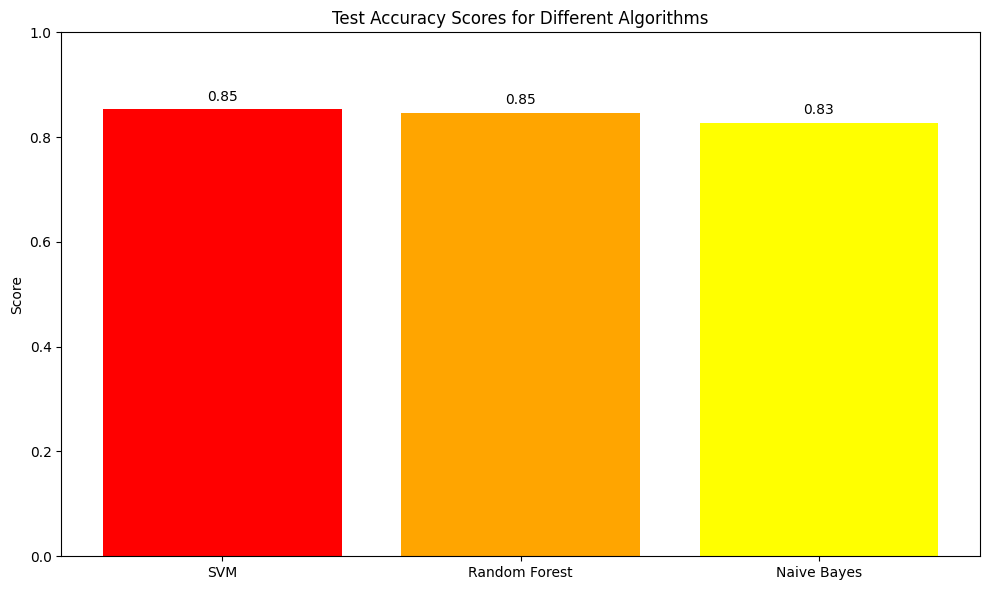

In [66]:
import matplotlib.pyplot as plt

metrics_acc_train = ['SVM', 'Random Forest', 'Naive Bayes']
values_acc_train = [acc_train_SVM, acc_train_RF, acc_train_NB]

metrics_acc_test = ['SVM', 'Random Forest', 'Naive Bayes']
values_acc_test = [acc_test_SVM, acc_test_RF, acc_test_NB]

x_acc_train = range(len(metrics_acc_train))
x_acc_test = range(len(metrics_acc_test))

plt.figure(figsize=(10, 6))
plt.bar(x_acc_train, values_acc_train, color=['blue', 'green', 'purple'])

plt.xticks(x_acc_train, metrics_acc_train)
for i, value in enumerate(values_acc_train):
    plt.text(i, value + 0.01, str(round(value, 2)), ha='center', va='bottom')

plt.title('Train Accuracy Scores for Different Algorithms')
plt.ylabel('Score')
plt.ylim(0, 1)  
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(x_acc_test, values_acc_test, color=['red', 'orange', 'yellow'])

plt.xticks(x_acc_test, metrics_acc_test)
for i, value in enumerate(values_acc_test):
    plt.text(i, value + 0.01, str(round(value, 2)), ha='center', va='bottom')

plt.title('Test Accuracy Scores for Different Algorithms')
plt.ylabel('Score')
plt.ylim(0, 1) 
plt.tight_layout()
plt.show()


3- Precision

4- Recall

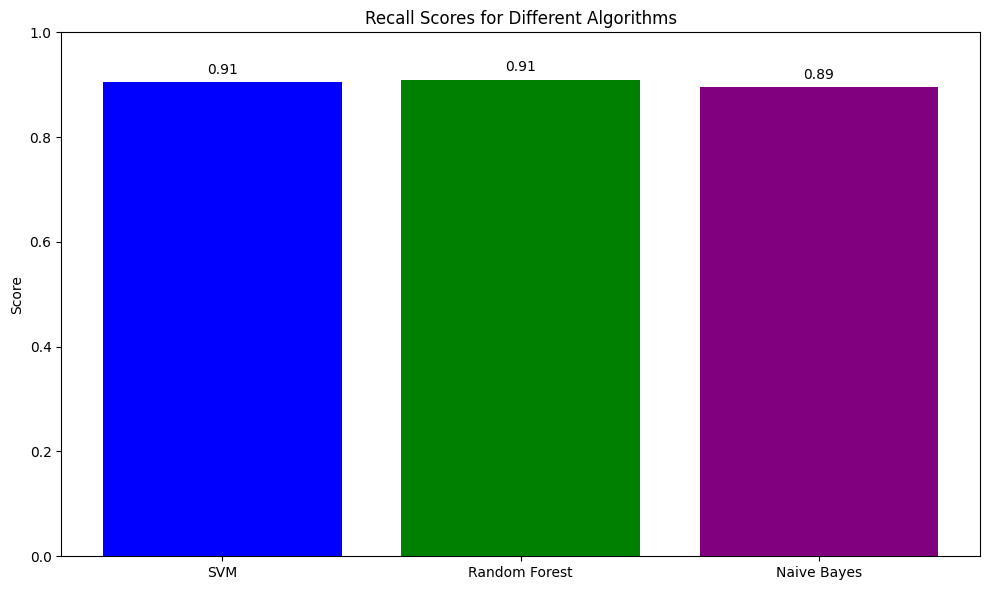

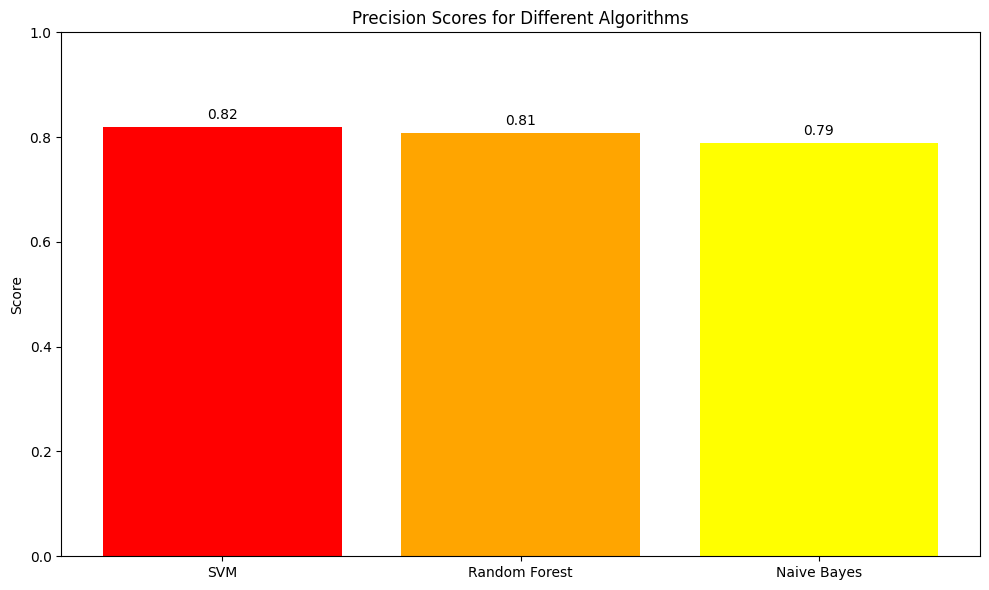

In [68]:
metrics_recall = ['SVM', 'Random Forest', 'Naive Bayes']
values_recall = [recall_SVM, recall_RF, recall_NB]

metrics_precision = ['SVM', 'Random Forest', 'Naive Bayes']
values_precision = [precision_SVM, precision_RF, precision_NB]

x_recall = range(len(metrics_recall))
x_precision = range(len(metrics_precision))

plt.figure(figsize=(10, 6))
plt.bar(x_recall, values_recall, color=['blue', 'green', 'purple'])

plt.xticks(x_recall, metrics_recall)
for i, value in enumerate(values_recall):
    plt.text(i, value + 0.01, str(round(value, 2)), ha='center', va='bottom')

plt.title('Recall Scores for Different Algorithms')
plt.ylabel('Score')
plt.ylim(0, 1)  
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(x_precision, values_precision, color=['red', 'orange', 'yellow'])

plt.xticks(x_precision, metrics_precision)
for i, value in enumerate(values_precision):
    plt.text(i, value + 0.01, str(round(value, 2)), ha='center', va='bottom')

plt.title('Precision Scores for Different Algorithms')
plt.ylabel('Score')
plt.ylim(0, 1) 
plt.tight_layout()
plt.show()
